## Tensorboard demo using handwritten digits classification using NN

In [12]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(X_train),len(X_test)

(60000, 10000)

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train[0].shape


(28, 28)

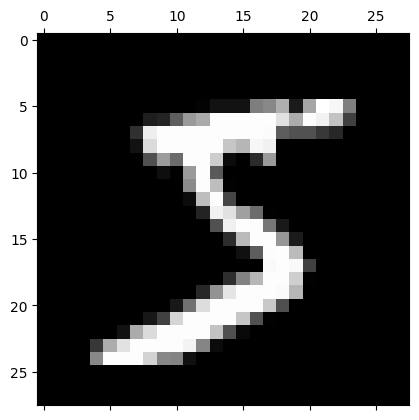

In [6]:
plt.matshow(X_train[0],cmap='gray')

In [7]:
y_train[0]

np.uint8(5)

In [8]:
X_train=X_train/255
X_test=X_test/255

In [10]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [11]:
X_train_flattened.shape

(60000, 784)

In [13]:
# Use Flatten layer so we don't have to reshape manually
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)
model.fit(X_train,y_train,epochs=5,callbacks=[tb_callback])

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 962us/step - accuracy: 0.8736 - loss: 0.4490
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 993us/step - accuracy: 0.9606 - loss: 0.1342
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9742 - loss: 0.0851
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9807 - loss: 0.0623
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9844 - loss: 0.0499


In [18]:
%load_ext tensorboard
%tensorboard --logdir logs/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6007 (pid 11908), started 0:00:05 ago. (Use '!kill 11908' to kill it.)

In [14]:
model.get_weights()

[array([[-2.2632927e-03,  7.2426349e-04, -4.7313407e-02, ...,
         -3.1730521e-02,  2.5146328e-02, -6.5840244e-02],
        [ 3.0660510e-02,  2.6458263e-02, -9.3139261e-03, ...,
         -2.3341328e-02,  3.5432778e-02,  9.8474473e-03],
        [ 5.9801817e-02, -6.9005638e-02,  5.9182942e-02, ...,
          8.1470534e-02, -7.9347104e-02, -3.2695208e-02],
        ...,
        [-1.3652630e-02,  2.7376615e-02, -1.1686109e-02, ...,
          1.4203079e-02,  9.3303621e-05, -6.5012053e-03],
        [ 1.0384664e-02,  4.4131279e-02,  7.0071936e-02, ...,
          6.2708631e-03,  4.6684012e-02,  3.0673318e-02],
        [-2.6779260e-02,  4.9185500e-02, -5.4804124e-02, ...,
          1.8407099e-02,  6.6013873e-02, -3.9560519e-02]], dtype=float32),
 array([ 0.01388467,  0.08058453, -0.02765463,  0.04927962,  0.04480818,
         0.22328053,  0.00716628,  0.06016313,  0.00672877,  0.09050093,
         0.08017118,  0.02325167,  0.10799768,  0.06236878,  0.05600288,
         0.10714159, -0.1085019